In [175]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [176]:
import yfinance as yf #yahoo finance

In [177]:
from datetime import datetime

end = datetime.now()
start = datetime(end.year-20 , end.month , end.day)


In [178]:
stock = "GOOG"
dataset = yf.download(stock , start , end)

[*********************100%***********************]  1 of 1 completed


In [179]:
dataset.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-10-26,4.641104,4.798016,4.483196,4.528028,4.516935,895628499
2004-10-27,4.550942,4.720307,4.527281,4.631889,4.620542,536262538
2004-10-28,4.649572,4.841602,4.622673,4.814454,4.802660,596097978
2004-10-29,4.953682,4.980083,4.747206,4.748203,4.736570,849672890
2004-11-01,4.820681,4.923296,4.763894,4.882449,4.870488,490828877


In [180]:
dataset.shape

(5035, 6)

In [181]:
dataset.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [182]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5035 entries, 2004-10-26 to 2024-10-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5035 non-null   float64
 1   High       5035 non-null   float64
 2   Low        5035 non-null   float64
 3   Close      5035 non-null   float64
 4   Adj Close  5035 non-null   float64
 5   Volume     5035 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.4 KB


In [183]:
dataset.duplicated().sum()

0

In [184]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5035.000000,5035.000000,5035.000000,5035.000000,5035.000000,5.035000e+03
mean,47.107044,47.601877,46.636953,47.126372,47.016134,1.127567e+08
std,45.015240,45.507350,44.575062,45.042540,44.946275,1.464097e+08
min,4.096396,4.221676,4.017691,4.112087,4.102013,1.584340e+05
25%,13.205378,13.348965,13.069512,13.199899,13.167561,2.677805e+07
50%,27.681002,27.818977,27.347916,27.649588,27.581852,5.258000e+07
75%,62.011749,62.496824,61.492250,62.023750,61.871803,1.375376e+08
max,191.750000,193.309998,190.619995,192.660004,192.406723,1.650833e+09


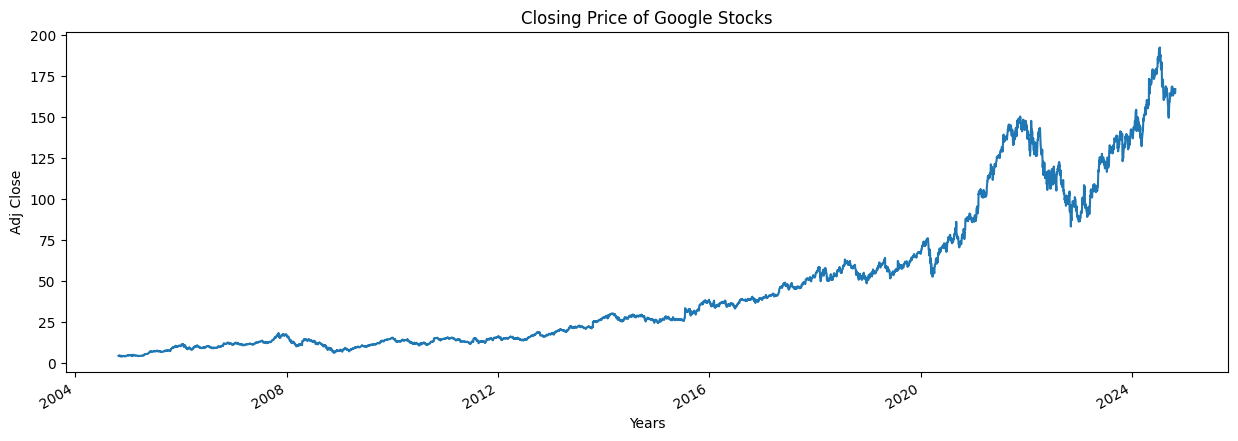

In [185]:
plt.figure(figsize=(15,5))
dataset["Adj Close"].plot()
plt.xlabel("Years")
plt.ylabel("Adj Close")
plt.title("Closing Price of Google Stocks")
plt.show()

In [186]:
def plot_graphs (figsize , values , column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("Years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google Stocks")
    plt.show()

In [187]:
dataset.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

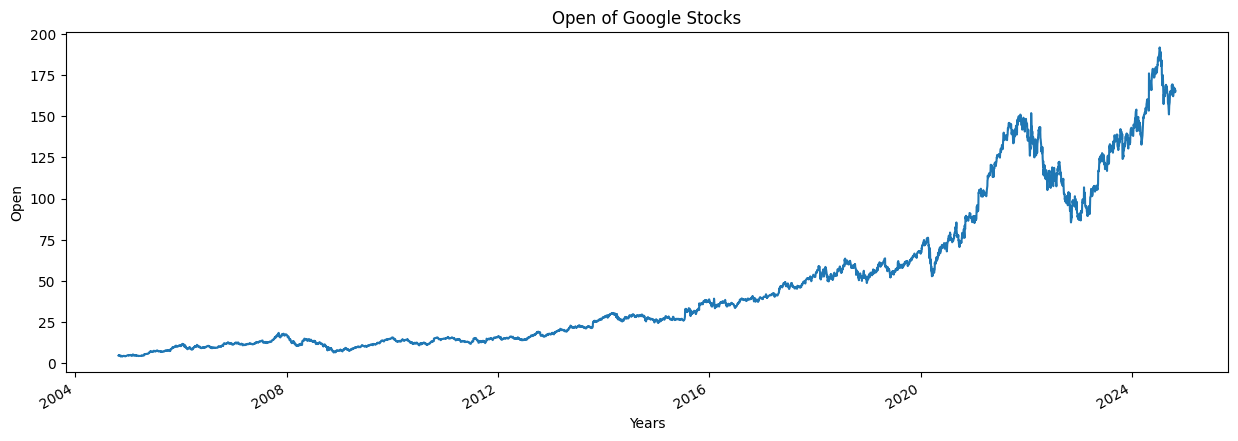

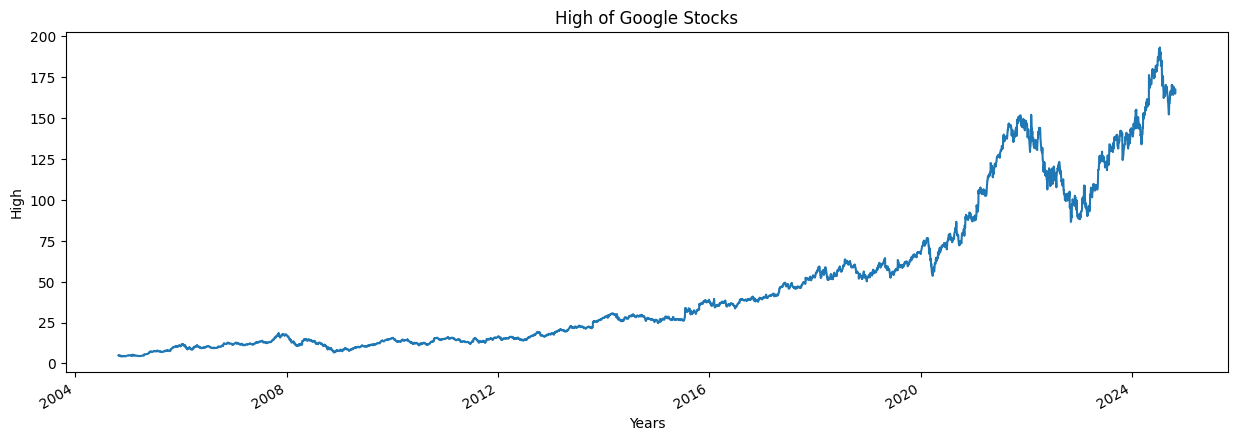

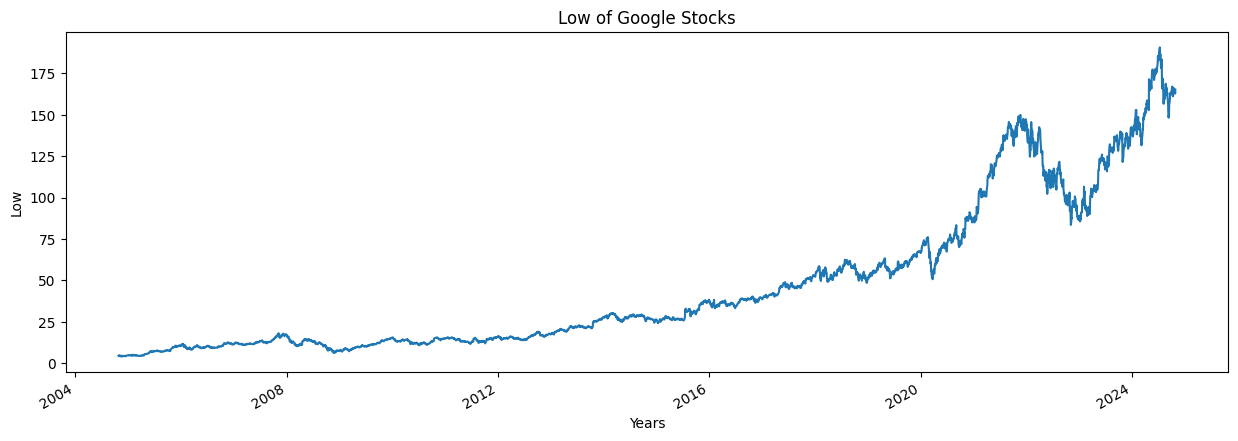

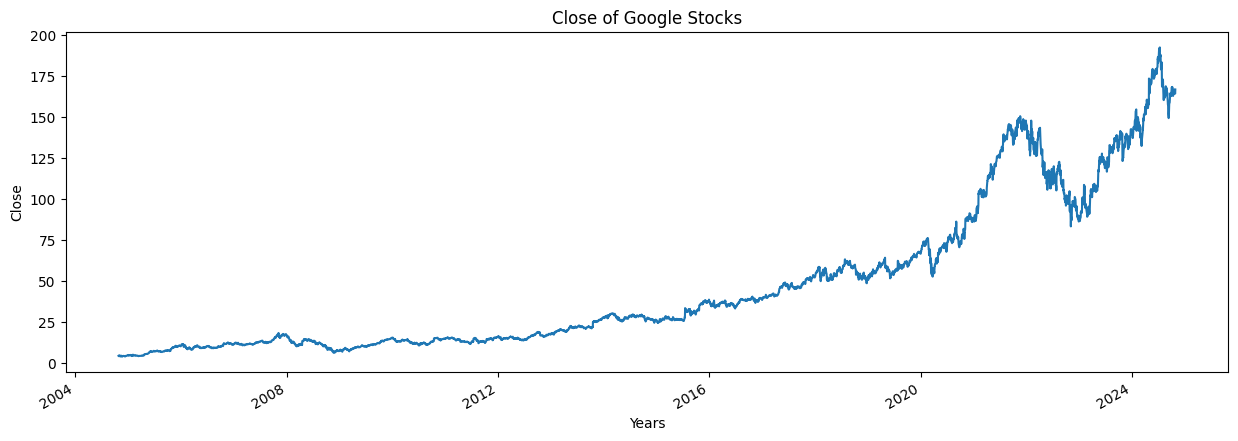

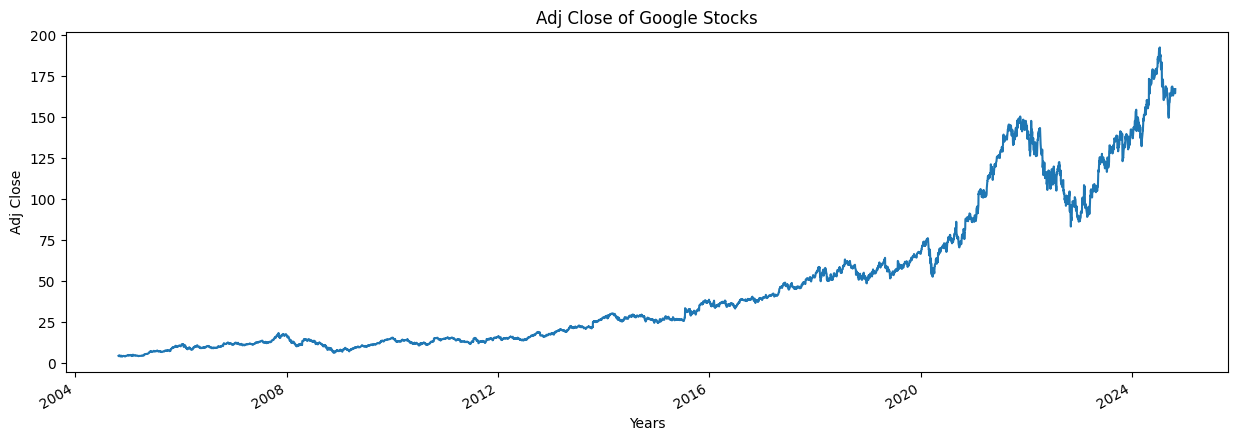

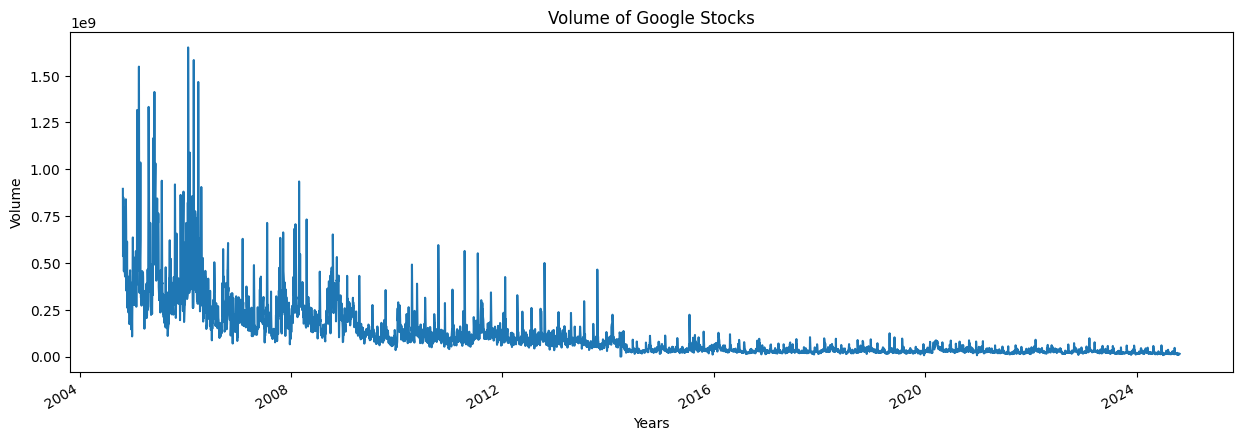

In [188]:
for column in dataset.columns:
    plot_graphs((15,5) , dataset[column] , column)

In [280]:
for i in range (2004 , 2025):
    print(i , list(dataset.index.year).count(i))

2004 47
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 207


In [281]:
dataset["Moving Average for 250 days"] = dataset["Adj Close"].rolling(250).mean()

In [282]:
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,Moving Average for 250 days,Moving Average for 100 days,Percentage Change Close Price
Date,,,,,,,,,
2004-10-26,4.641104,4.798016,4.483196,4.528028,4.516935,895628499,NaN,NaN,NaN
2004-10-27,4.550942,4.720307,4.527281,4.631889,4.620542,536262538,NaN,NaN,0.022937
2004-10-28,4.649572,4.841602,4.622673,4.814454,4.802660,596097978,NaN,NaN,0.039415
2004-10-29,4.953682,4.980083,4.747206,4.748203,4.736570,849672890,NaN,NaN,-0.013761
2004-11-01,4.820681,4.923296,4.763894,4.882449,4.870488,490828877,NaN,NaN,0.028273


In [283]:
dataset["Moving Average for 250 days"][0:250].tail()

Date
2005-10-14         NaN
2005-10-17         NaN
2005-10-18         NaN
2005-10-19         NaN
2005-10-20    5.845604
Name: Moving Average for 250 days, dtype: float64

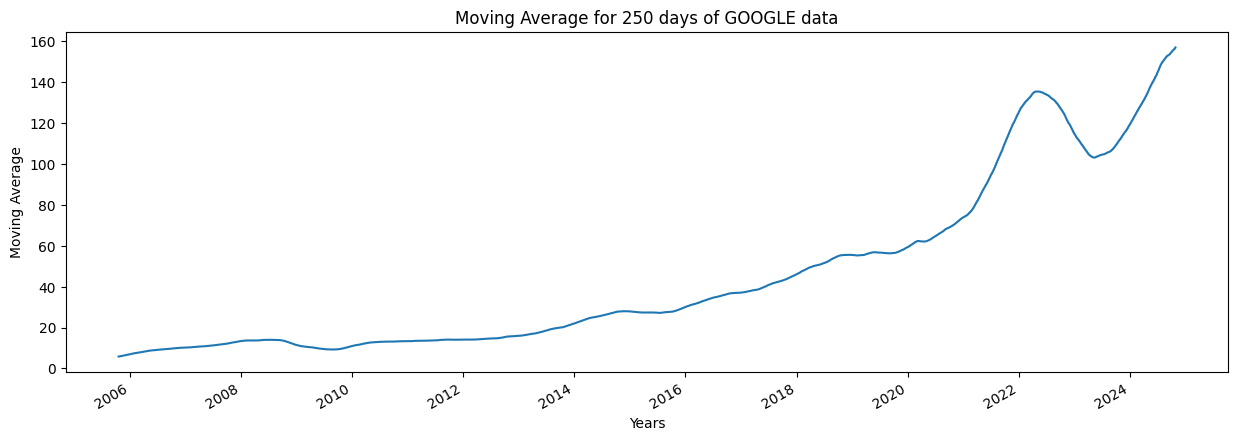

In [284]:
plt.figure(figsize=(15,5))
dataset["Moving Average for 250 days"].plot()

plt.title("Moving Average for 250 days of GOOGLE data")
plt.xlabel("Years")
plt.ylabel("Moving Average")
plt.show()

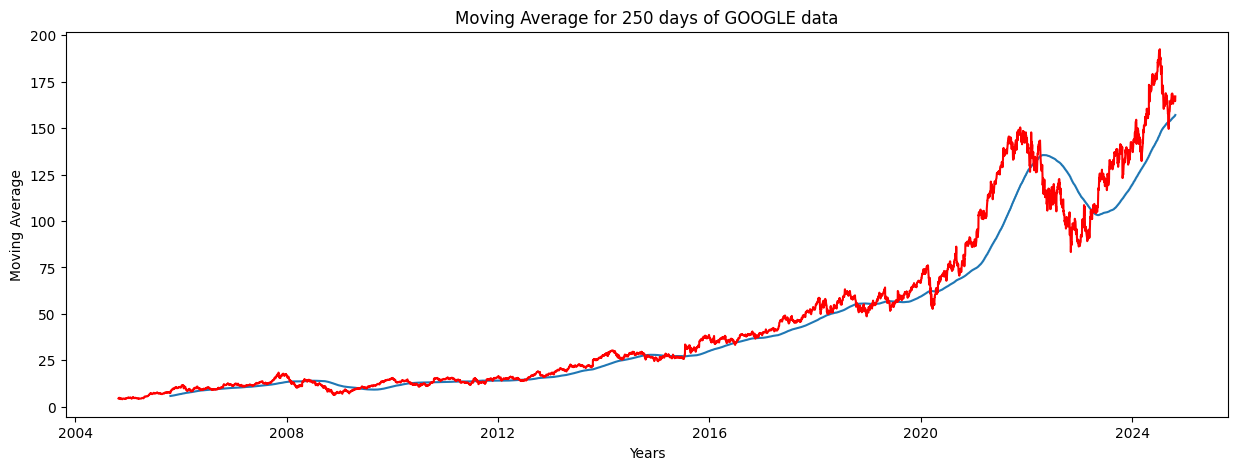

In [285]:
plt.figure(figsize=(15,5))


plt.plot(dataset["Moving Average for 250 days"]  )
plt.plot(dataset["Adj Close"], c = "r")


plt.title("Moving Average for 250 days of GOOGLE data")
plt.xlabel("Years")
plt.ylabel("Moving Average")


plt.show()

In [286]:
dataset["Moving Average for 100 days"] = dataset["Adj Close"].rolling(100).mean()


In [287]:
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,Moving Average for 250 days,Moving Average for 100 days,Percentage Change Close Price
Date,,,,,,,,,
2004-10-26,4.641104,4.798016,4.483196,4.528028,4.516935,895628499,NaN,NaN,NaN
2004-10-27,4.550942,4.720307,4.527281,4.631889,4.620542,536262538,NaN,NaN,0.022937
2004-10-28,4.649572,4.841602,4.622673,4.814454,4.802660,596097978,NaN,NaN,0.039415
2004-10-29,4.953682,4.980083,4.747206,4.748203,4.736570,849672890,NaN,NaN,-0.013761
2004-11-01,4.820681,4.923296,4.763894,4.882449,4.870488,490828877,NaN,NaN,0.028273


In [288]:
dataset["Moving Average for 100 days"][0:100].tail()

Date
2005-03-14         NaN
2005-03-15         NaN
2005-03-16         NaN
2005-03-17         NaN
2005-03-18    4.617821
Name: Moving Average for 100 days, dtype: float64

<Figure size 640x480 with 0 Axes>

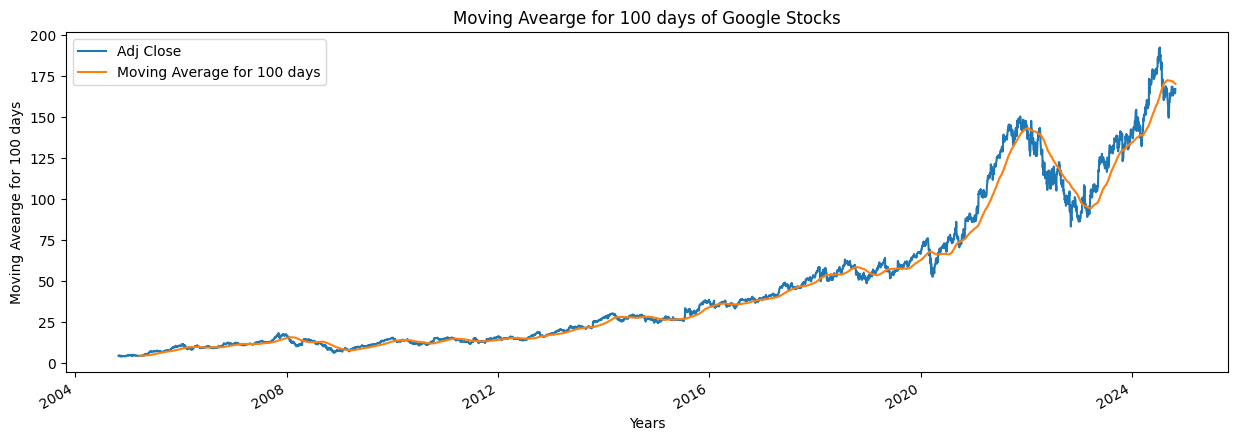

In [289]:
plot_graphs( (15,5) , dataset[["Adj Close" , "Moving Average for 100 days"]] , "Moving Avearge for 100 days")

<Figure size 640x480 with 0 Axes>

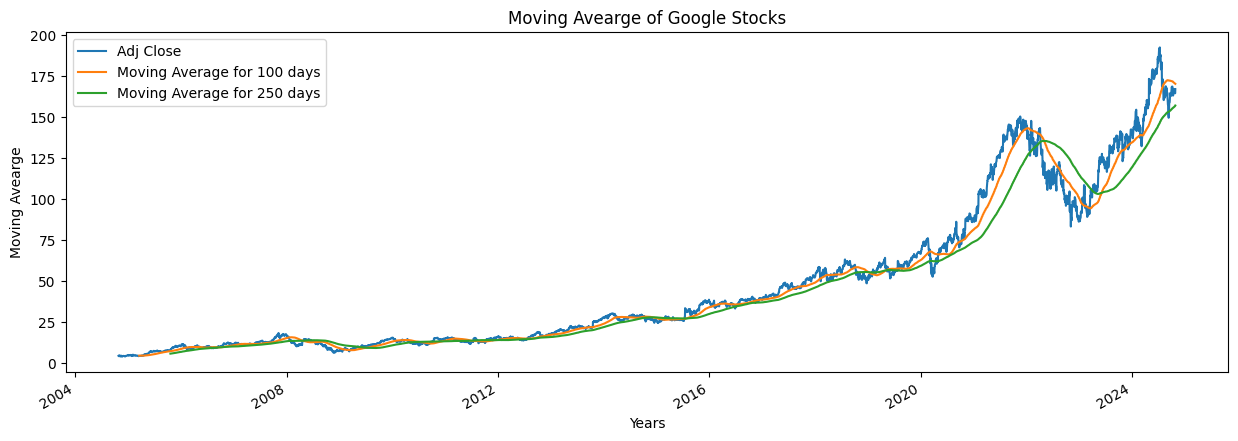

In [290]:
plot_graphs( (15,5) , dataset[["Adj Close" , "Moving Average for 100 days" , "Moving Average for 250 days"]] , "Moving Avearge")

In [291]:
dataset["Percentage Change Close Price"] = dataset['Adj Close'].pct_change()
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,Moving Average for 250 days,Moving Average for 100 days,Percentage Change Close Price
Date,,,,,,,,,
2004-10-26,4.641104,4.798016,4.483196,4.528028,4.516935,895628499,NaN,NaN,NaN
2004-10-27,4.550942,4.720307,4.527281,4.631889,4.620542,536262538,NaN,NaN,0.022937
2004-10-28,4.649572,4.841602,4.622673,4.814454,4.802660,596097978,NaN,NaN,0.039415
2004-10-29,4.953682,4.980083,4.747206,4.748203,4.736570,849672890,NaN,NaN,-0.013761
2004-11-01,4.820681,4.923296,4.763894,4.882449,4.870488,490828877,NaN,NaN,0.028273


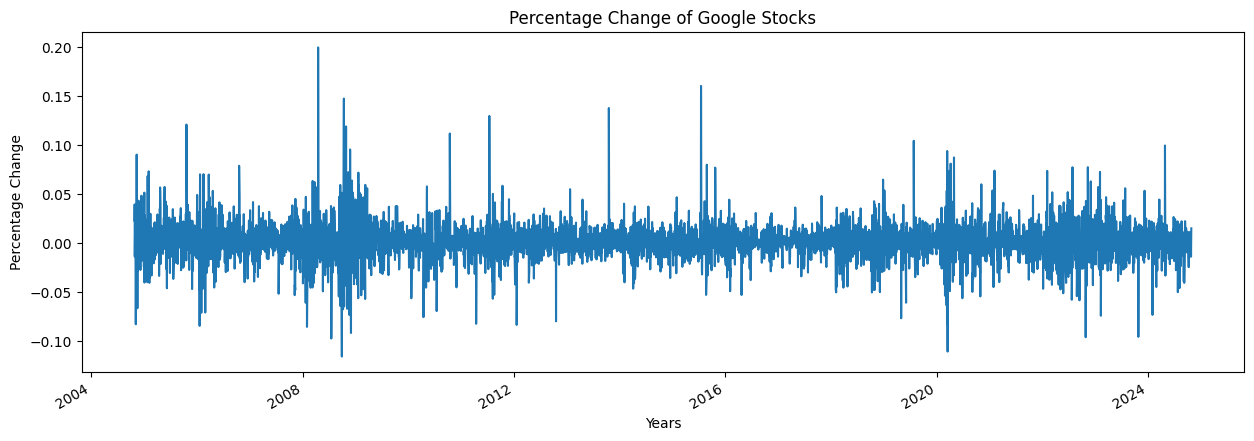

In [292]:
plot_graphs( (15,5) , dataset["Percentage Change Close Price"] , "Percentage Change")

In [293]:
adj_close_price = dataset[["Adj Close"]]

In [294]:
adj_close_price.head()

,Adj Close
Date,
2004-10-26,4.516935
2004-10-27,4.620542
2004-10-28,4.802660
2004-10-29,4.736570
2004-11-01,4.870488


In [295]:
min(adj_close_price.values) , max(adj_close_price.values)

(array([4.10201311]), array([192.40672302]))

In [296]:
from sklearn.preprocessing import MinMaxScaler

In [297]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(adj_close_price)
scaled_data

array([[0.00220346],
       [0.00275367],
       [0.00372081],
       ...,
       [0.85169395],
       [0.8519595 ],
       [0.86502346]])

In [298]:
len(scaled_data)

5035

In [299]:
x_data = []   
y_data = []

#taking 100 rows to predict the 101th row

for i in range (100 ,  len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])



In [300]:
type(x_data) , type(y_data)

(list, list)

In [301]:
x_data = np.array(x_data)
y_data = np.array(y_data)

In [302]:
type(x_data) , type(y_data)

(numpy.ndarray, numpy.ndarray)

In [303]:
len(x_data[0]) , len(y_data[0])

(100, 1)

In [304]:
x_data[0] 

array([[0.00220346],
       [0.00275367],
       [0.00372081],
       [0.00336984],
       [0.00408102],
       [0.00392797],
       [0.00350574],
       [0.0025861 ],
       [0.00056076],
       [0.00098298],
       [0.000475  ],
       [0.00036416],
       [0.00236443],
       [0.00222985],
       [0.00260853],
       [0.00098166],
       [0.00097638],
       [0.00032194],
       [0.00056736],
       [0.        ],
       [0.0003193 ],
       [0.00127457],
       [0.00188548],
       [0.0021045 ],
       [0.00222721],
       [0.00196069],
       [0.0018868 ],
       [0.00201874],
       [0.00147645],
       [0.0008352 ],
       [0.00064388],
       [0.00109909],
       [0.00086423],
       [0.0007059 ],
       [0.00179312],
       [0.00193693],
       [0.0015002 ],
       [0.00197651],
       [0.00262832],
       [0.00246075],
       [0.00279721],
       [0.00300831],
       [0.00353741],
       [0.00364957],
       [0.00366804],
       [0.00428817],
       [0.00365352],
       [0.004

In [305]:
y_data[0]

array([0.00208208])

In [325]:
#from sklearn.model_selection import train_test_split

In [326]:
#x_train , x_test , y_train , y_test = train_test_split(x_data , y_data , test_size=0.3 , random_state=1) 

In [327]:
splitting_len = int(len(x_data)*0.7)

x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]



x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]


In [328]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3454, 100, 1)
(1481, 100, 1)
(3454, 1)
(1481, 1)


In [329]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense , LSTM , Dropout

In [330]:
x_train.shape[1]

100

In [331]:
model = Sequential()

model.add(LSTM(128, return_sequences=True , input_shape = (x_train.shape[1],1)))
model.add(LSTM(64))
model.add(Dense(25))
model.add(Dense(1))

C:\Users\shabi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [332]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [333]:
model.compile(optimizer="Adam" , loss="mean_squared_error" )

In [334]:
model.fit(x_train , y_train , batch_size=1 , epochs=2)

Epoch 1/2
3454/3454 ━━━━━━━━━━━━━━━━━━━━ 54s 15ms/step - loss: 1.9232e-04
Epoch 2/2
3454/3454 ━━━━━━━━━━━━━━━━━━━━ 56s 16ms/step - loss: 6.2004e-05


In [335]:
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


In [336]:
predictions

array([[0.25538293],
       [0.25105694],
       [0.24916542],
       ...,
       [0.7993929 ],
       [0.79578185],
       [0.79323703]], dtype=float32)

In [337]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 52.191822],
       [ 51.37722 ],
       [ 51.021034],
       ...,
       [154.63145 ],
       [153.95148 ],
       [153.47227 ]], dtype=float32)

In [338]:
y_test

array([[0.25278187],
       [0.25356856],
       [0.25680007],
       ...,
       [0.85169395],
       [0.8519595 ],
       [0.86502346]])

In [339]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 51.70203018],
       [ 51.85016632],
       [ 52.45867538],
       ...,
       [164.47999573],
       [164.52999878],
       [166.99000549]])

In [340]:
splitting_len = int(len(x_data) * 0.7)

In [341]:
plotting_data = pd.DataFrame(

    {
        "Original Test Data" : inv_y_test.reshape(-1),
        "Predictions" : inv_predictions.reshape(-1)
    },

    index = dataset.index[splitting_len + 100: ]    
)

plotting_data.head()

,Original Test Data,Predictions
Date,,
2018-12-07,51.702030,52.191822
2018-12-10,51.850166,51.377220
2018-12-11,52.458675,51.021034
2018-12-12,53.053707,51.262489
2018-12-13,52.964928,51.811699


<Figure size 640x480 with 0 Axes>

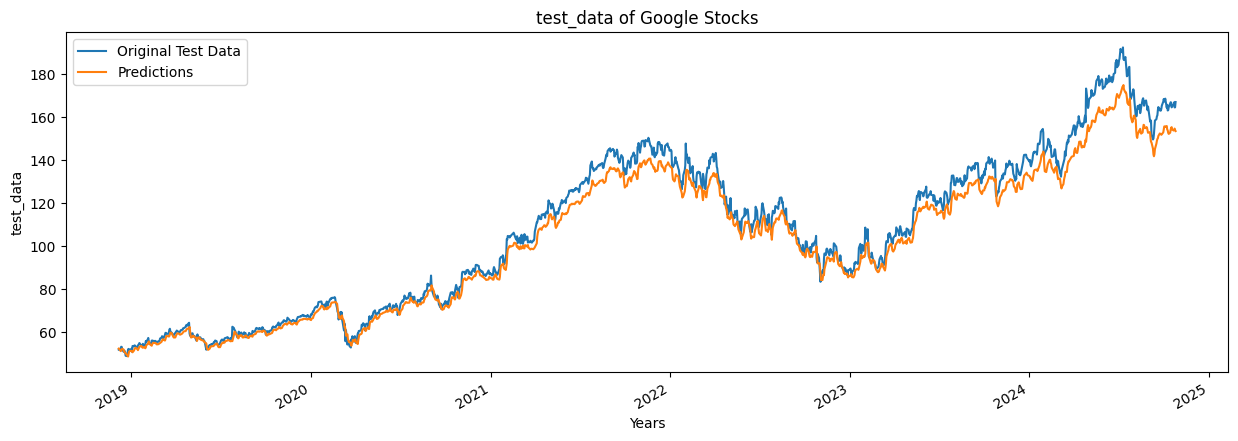

In [342]:
plot_graphs ((15,5) , plotting_data, "test_data")

<Figure size 640x480 with 0 Axes>

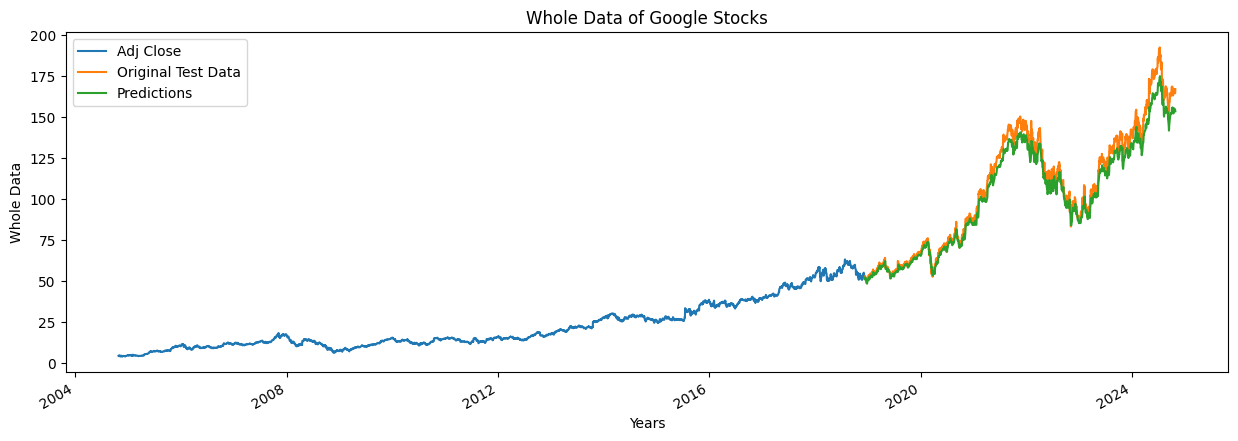

In [345]:
plot_graphs((15,5) , pd.concat([adj_close_price[:splitting_len+100] , plotting_data], axis = 0) , "Whole Data")